# Word2Vec

这节通过gensim和pytorch训练日常使用的Word2Vec模型。

## Gensim

In [1]:
import gensim

In [2]:
sentences = [['first', 'sentence'], ['second', 'sentence']]

# 传入文本数据，直接初始化并训练Word2Vec模型
model = gensim.models.Word2Vec(sentences, min_count=1)
model.wv.key_to_index['first']

2

In [3]:
# 词之间的相似度
model.wv.similarity('first', 'second')

-0.023671666

### 例子1：gensim训练英文word2vec模型

gensim下的word2vec模型可以继续训练，下面的例子把常用参数写上：

In [4]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

print(common_texts[:200])
model = Word2Vec(sentences=common_texts, vector_size=100,
                 window=5, min_count=1, workers=4)
model

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [5]:
model.save("word2vec.model")

# 先保存，再继续接力训练
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)
model

In [6]:
vector1 = model.wv['computer']  # get numpy vector of a word
vector1

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428458,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.00448759,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811904, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [7]:
sims = model.wv.most_similar('computer', topn=10)  # get other similar words
sims

[('system', 0.21617142856121063),
 ('survey', 0.044689200818538666),
 ('interface', 0.01520337350666523),
 ('time', 0.0019510575802996755),
 ('trees', -0.03284314647316933),
 ('human', -0.0742427185177803),
 ('response', -0.09317588806152344),
 ('graph', -0.09575346857309341),
 ('eps', -0.10513805598020554),
 ('user', -0.16911622881889343)]

仅仅保存模型训练好的词向量键值对，通过 `KeyedVectors` 快速加载到内存，计算词的向量值：

In [8]:
from gensim.models import KeyedVectors
# Store just the words + their trained embeddings.
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
vector2 = wv['computer']  # Get numpy vector of a word
vector2

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428458,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.00448759,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811904, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [9]:
compare = vector1 == vector2
compare.all()

True

向量结果是一样的。

### 例子2：gensim训练中文word2vec模型

In [10]:
txt_path = 'data/C000008_test.txt'
sentences = [i.split() for i in open(txt_path, 'r', encoding='utf-8').read().split('\n')]
sentences[:2]

[['1,本报记者',
  '发自',
  '上海',
  '国外',
  '媒体',
  '昨日',
  '报道',
  '澳大利亚',
  '银行',
  'acq',
  'arie',
  '预计',
  '推出',
  '中国',
  '人民币',
  '10',
  '亿元',
  '商业',
  '住房',
  '抵押',
  '贷款',
  '资产',
  '证券化',
  '计划',
  '有关部门',
  '批准',
  '将是',
  '海外',
  '资金',
  '首次',
  '此项',
  '计划',
  '市场分析',
  '人士',
  '计划',
  '预计',
  '中国',
  '监管部门',
  '阻力',
  '考虑到',
  '交易',
  '相关',
  '高昂',
  '固定成本',
  '人民币',
  '10',
  '亿元',
  '可能是',
  '最低',
  '金额',
  '银行',
  '原本',
  '计划',
  '2006',
  '年初',
  '中国',
  '推出',
  'macquarie',
  'anda',
  '房地产',
  '投资信托',
  '计划',
  '香港特区',
  '证监会',
  '否决',
  '该银行',
  '中国',
  '房地产投资',
  '基金',
  '首席',
  '投资',
  '执行官',
  '此前',
  '开发商',
  '行列',
  '竟是',
  '金融机构',
  '项目',
  '投融资',
  '资本运作',
  '才是',
  '特长'],
 ['2,复旦',
  '新浪',
  '本报记者',
  '杨国强',
  '1984年',
  '相貌端正',
  '复旦大学',
  '新闻系',
  '大学',
  '同学',
  '回忆说',
  '内向',
  '做事',
  '很有',
  '生活',
  '学习',
  '很有',
  '计划性',
  '大学毕业',
  '上海',
  '电视台',
  '当了',
  '两年',
  '记者',
  '赴美',
  '求学',
  '先在',
  '奥克拉荷',
  '大学',
  '拿了',
  '新闻学',
  '硕士',
  '再到',
  '德州',


In [11]:
model = gensim.models.Word2Vec(
    sentences, vector_size=50, window=5, min_count=1, workers=4)
model.save('C000008.word2vec.model')
model.wv.key_to_index

{'新浪': 0,
 '中国': 1,
 '化妆品': 2,
 '美国': 3,
 '广告': 4,
 '碎片': 5,
 '计划': 6,
 '地球': 7,
 '销售': 8,
 '上市': 9,
 '5月': 10,
 '科学家': 11,
 '皮肤': 12,
 '改善': 13,
 '大学': 14,
 '的产品': 15,
 '市场': 16,
 '彗星': 17,
 '财务': 18,
 '预计': 19,
 '参与': 20,
 '网站': 21,
 '兼任': 22,
 '提供': 23,
 '瓦斯': 24,
 '高科技公司': 25,
 '73p': 26,
 '负责': 27,
 '植物': 28,
 '拿了': 29,
 '2005年': 30,
 '1999': 31,
 '距离': 32,
 '硕士': 33,
 '首席': 34,
 '2000': 35,
 '年度': 36,
 '10': 37,
 '报道': 38,
 '银行': 39,
 '担任': 40,
 '推出': 41,
 '便宜': 42,
 '之间': 43,
 '人民币': 44,
 '2005': 45,
 '亿元': 46,
 '商业': 47,
 '推动': 48,
 'cfo': 49,
 '12日': 50,
 '宇航局': 51,
 '互联网': 52,
 '海外': 53,
 '上海': 54,
 '首次': 55,
 '很有': 56,
 '3号': 57,
 '德州': 58,
 '奥斯汀': 59,
 '再到': 60,
 '赴美': 61,
 '新闻学': 62,
 '奥克拉荷': 63,
 '电视台': 64,
 '先在': 65,
 '求学': 66,
 '当了': 67,
 '两年': 68,
 '记者': 69,
 '那一': 70,
 '专业': 71,
 '副总裁': 72,
 '照搬': 73,
 '变了': 74,
 '2001': 75,
 '2001年': 76,
 '借鉴': 77,
 '中国概念股': 78,
 '余家': 79,
 '结构': 80,
 '公司': 81,
 '设计': 82,
 '运作': 83,
 '加盟': 84,
 '身份': 85,
 '多家': 86,
 '转入': 87,
 '在此期间'

In [12]:
# key index
print(model.wv.key_to_index['中国'])
print(model.wv.key_to_index['澳大利亚'])

# word vector
print(model.wv['中国'])
print(model.wv['澳大利亚'])

# compare two word
print(model.wv.similarity('中国', '澳大利亚'))

1
131
[-0.01635404  0.00892374 -0.00824884  0.00170714  0.01705568 -0.00899647
  0.00914393 -0.01339554 -0.00736877  0.01885619 -0.00314003  0.0005598
 -0.00817219 -0.01527859 -0.0030647   0.00505625 -0.00163121  0.01093926
 -0.00567137  0.00446063  0.01084758  0.01680043 -0.00283044 -0.018494
  0.00881959  0.00127615  0.01478991 -0.00165017 -0.00545879 -0.01751602
 -0.00163091  0.00587183  0.01071152  0.01424571 -0.01153169  0.00400406
  0.01238476 -0.00952362 -0.00622743  0.01345337  0.00357411  0.00042622
  0.00689636  0.0005763   0.01942016  0.0100719  -0.01777284 -0.01420312
  0.00203524  0.01278464]
[-0.00724434  0.00724444 -0.00516048 -0.00945492 -0.00724321 -0.01235146
  0.00705467 -0.01544216 -0.01511148 -0.00901232  0.01482126  0.00356372
  0.01094765  0.01646764 -0.01249899 -0.00918809  0.01543008  0.00986083
  0.00925157  0.01797456  0.01754135 -0.00537365  0.00210229  0.01097721
  0.01779929  0.01981683 -0.01665249 -0.0102626   0.00993185  0.00185638
  0.00029913  0.015080

## PyTorch

演示使用pytorch训练skip-gram的word2vec模型，比上一节的论文实现简化一些。

In [13]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import torch
import numpy as np
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(
        range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels


class Word2Vec(nn.Module):
    # Model
    def __init__(self):
        super(Word2Vec, self).__init__()
        # W and WT is not Traspose relationship
        # voc_size > embedding_size Weight
        self.W = nn.Linear(voc_size, embedding_size, bias=False)
        # embedding_size > voc_size Weight
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, X):
        # X : [batch_size, voc_size]
        hidden_layer = self.W(X)  # hidden_layer : [batch_size, embedding_size]
        # output_layer : [batch_size, voc_size]
        output_layer = self.WT(hidden_layer)
        return output_layer

定义参数，开始训练：

Epoch: 1000 cost = 1.119079
Epoch: 2000 cost = 1.241441
Epoch: 3000 cost = 1.609436
Epoch: 4000 cost = 1.662706
Epoch: 5000 cost = 1.212765
Epoch: 6000 cost = 0.920481
Epoch: 7000 cost = 1.035215
Epoch: 8000 cost = 1.205380
Epoch: 9000 cost = 1.611376


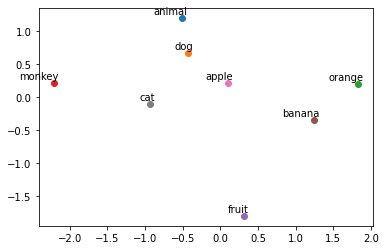

In [14]:
batch_size = 2  # mini-batch size
embedding_size = 10  # embedding size

sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit",
             "dog cat animal", "cat monkey animal", "monkey dog animal"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
voc_size = len(word_list)

# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]],
               word_dict[word_sequence[i + 1]]]
    for w in context:
        skip_grams.append([target, w])

model = Word2Vec()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
for epoch in range(9000):
    input_batch, target_batch = random_batch()
    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x, y = W[0][i].item(), W[1][i].item()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

In [15]:
import os
os.remove('word2vec.model')
os.remove('word2vec.wordvectors')
os.remove('C000008.word2vec.model')

本节完。